In [1]:
# Packages installation

!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Imports

import pandas as pd
import io
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()

Saving metacritic_games_cleaned.csv to metacritic_games_cleaned.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['metacritic_games_cleaned.csv']))
df.head()

,game,platform,developer,genre,rating,release_date,metascore,user_score
0,Portal 2,PC,Valve Software,Action,E10+,"Apr 18, 2011",95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,M,"Nov 10, 2011",94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,E10+,"Jun 19, 2011",94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,T,"Nov 21, 2011",91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,E,"Nov 13, 2011",90,84


In [4]:
stats_subset = df[['release_date', 'metascore', 'user_score' ]]
stats_subset.head()

,release_date,metascore,user_score
0,"Apr 18, 2011",95,90
1,"Nov 10, 2011",94,82
2,"Jun 19, 2011",94,90
3,"Nov 21, 2011",91,87
4,"Nov 13, 2011",90,84


In [5]:
for index in stats_subset.index:
    stats_subset.loc[index,['release_date']] = stats_subset.loc[index]['release_date'][8:]

stats_subset.head()

,release_date,metascore,user_score
0,2011,95,90
1,2011,94,82
2,2011,94,90
3,2011,91,87
4,2011,90,84


In [6]:
# stats_subset.loc[(stats_subset['release_date'] == '2011')]
# stats_subset.loc[(stats_subset['release_date'] == '2011'), ['metascore', 'user_score' ]].mean()
# stats_subset.groupby('release_date')[['metascore', 'user_score']].mean()

In [7]:
stats_visualization = stats_subset.groupby('release_date')[['metascore', 'user_score']].mean()
stats_visualization.reset_index(inplace=True)
stats_visualization

,release_date,metascore,user_score
0,2011,68.507407,65.381481
1,2012,70.080429,68.450402
2,2013,70.932347,68.845666
3,2014,71.927132,68.612403
4,2015,71.770808,67.680338
5,2016,71.732694,66.856230
6,2017,72.817533,66.795107
7,2018,80.797959,72.310204


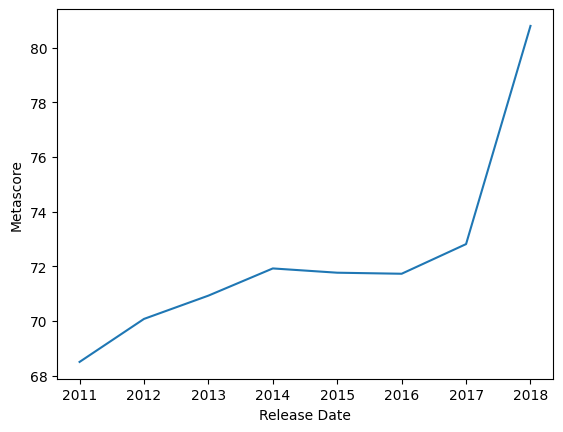

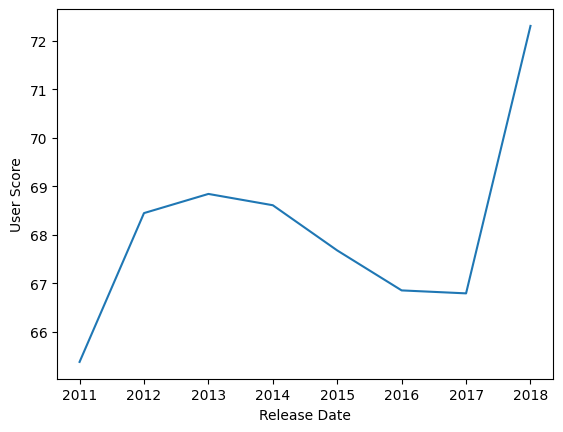

In [9]:
plt.plot(stats_visualization['release_date'], stats_visualization['metascore'])
plt.xlabel('Release Date')
plt.ylabel('Metascore')
plt.show()

plt.plot(stats_visualization['release_date'], stats_visualization['user_score'])
plt.xlabel('Release Date')
plt.ylabel('User Score')
plt.show()